In [1]:
from scipy.optimize import rosen, rosen_der, rosen_hess, rosen_hess_prod, minimize
from matplotlib import pyplot as plt
import numpy as np
import time
import pandas as pd
%matplotlib inline

### nice tutorial
http://www.scipy-lectures.org/advanced/mathematical_optimization/

Rosenbrock function:
https://en.wikipedia.org/wiki/Rosenbrock_function

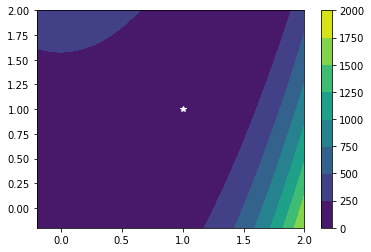

In [2]:
x = np.linspace(-0.2, 2, 101)
xx, yy = np.array(np.meshgrid(x, x))
plt.contourf(x, x, rosen([xx, yy]))
plt.plot(1,1,'w*')
plt.colorbar()

### Solving equations:

Newton's method:
https://en.wikipedia.org/wiki/Newton%27s_method

Secant method:
https://en.wikipedia.org/wiki/Secant_method

Broyden's method:
https://en.wikipedia.org/wiki/Broyden%27s_method

### Optimization

Nelder-Mead algorithm:
https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

BFGS algorithm:
https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [3]:
minimize(rosen, [2,3], method = 'Nelder-Mead')

 final_simplex: (array([[0.99998529, 0.99997065],
       [1.00002239, 1.00004372],
       [1.00002909, 1.00005993]]), array([2.17177653e-10, 6.13513659e-10, 1.15113945e-09]))
           fun: 2.1717765323851955e-10
       message: 'Optimization terminated successfully.'
          nfev: 158
           nit: 84
        status: 0
       success: True
             x: array([0.99998529, 0.99997065])

In [4]:
minimize(rosen, [2,3], method = 'BFGS', jac = rosen_der)

      fun: 1.3831659900787323e-15
 hess_inv: array([[0.47650293, 0.95190424],
       [0.95190424, 1.90655387]])
      jac: array([ 5.64772996e-07, -3.16053139e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 22
     njev: 27
   status: 0
  success: True
        x: array([0.99999997, 0.99999993])

In [5]:
minimize(rosen, [2,3], method = 'BFGS')

      fun: 2.0358716035099102e-11
 hess_inv: array([[0.47656345, 0.95202137],
       [0.95202137, 1.90678021]])
      jac: array([ 5.61744012e-07, -3.14269366e-07])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 22
     njev: 27
   status: 0
  success: True
        x: array([0.99999549, 0.99999097])

In [6]:
minimize(rosen, [0,3], method = 'Newton-CG', jac = rosen_der, hess = rosen_hess)

     fun: 7.723439484171331e-15
     jac: array([ 2.90996472e-05, -1.46085841e-05])
 message: 'Optimization terminated successfully.'
    nfev: 52
    nhev: 35
     nit: 35
    njev: 86
  status: 0
 success: True
       x: array([0.99999991, 0.99999982])

In [7]:
points = np.random.random((100, 2))*10-5
methods = [
    {'name': 'Nelder-Mead', 'method': 'Nelder-Mead', 'jac' : None, 'hess' : None},
    {'name': 'Powell', 'method': 'Powell', 'jac' : None, 'hess' : None},
    {'name': 'BFGS no jac', 'method': 'BFGS', 'jac' : None, 'hess' : None},
    {'name': 'BFGS', 'method': 'BFGS', 'jac' : rosen_der, 'hess' : None},
    {'name': 'L-BFGS-B no jac', 'method': 'L-BFGS-B', 'jac' : None, 'hess' : None},
    {'name': 'L-BFGS-B', 'method': 'L-BFGS-B', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG no hess', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : rosen_hess}
]

data = []
solution_x = np.array([1,1])
solution_fun = 0

for method_json in methods:
    print('Running', method_json['name'])
    
    for point in points:
        t = time.time()
        try:
            res = minimize(rosen, point, method = method_json['method'],
                           jac = method_json['jac'], hess = method_json['hess'])
        except:
            pass
        
        try:
            njev = res.njev
        except:
            njev = 0
        try:
            nhev = res.nhev
        except:
            nhev = 0
        data.append([method_json['name'], np.abs(res.fun - solution_fun), 
                    np.linalg.norm(solution_x - res.x),
                    res.nfev, njev, nhev, res.nit, time.time() - t])

Running Nelder-Mead
Running Powell
Running BFGS no jac
Running BFGS
Running L-BFGS-B no jac
Running L-BFGS-B
Running Newton-CG no hess
Running Newton-CG


In [8]:
df = pd.DataFrame(data, columns = ['method', 'delta_fun', 'delta_x', 'nfev', 'njev', 'nhev', 'nit', 't'])

In [9]:
df.groupby('method').median()

,delta_fun,delta_x,nfev,njev,nhev,nit,t
method,,,,,,,
BFGS,1.636331e-15,3.743210e-08,56.5,56.5,0.0,44.0,0.004716
BFGS no jac,1.988491e-11,9.968281e-06,278.0,69.5,0.0,44.0,0.007581
L-BFGS-B,6.490643e-14,2.979625e-07,38.0,0.0,0.0,31.0,0.002506
L-BFGS-B no jac,9.092062e-12,6.732049e-06,115.5,0.0,0.0,31.0,0.002500
Nelder-Mead,4.625267e-10,2.676636e-05,151.0,0.0,0.0,81.5,0.004479
Newton-CG,1.058534e-12,2.281248e-06,53.5,90.0,37.5,37.5,0.007043
Newton-CG no hess,2.046742e-12,3.189506e-06,55.5,207.0,0.0,38.0,0.008989
Powell,7.343802e-29,1.361447e-14,510.0,0.0,0.0,18.0,0.012985


In [10]:
points = np.random.random((100, 10))*10-5
methods = [
    {'name': 'Nelder-Mead', 'method': 'Nelder-Mead', 'jac' : None, 'hess' : None},
    {'name': 'Powell', 'method': 'Powell', 'jac' : None, 'hess' : None},
    {'name': 'BFGS no jac', 'method': 'BFGS', 'jac' : None, 'hess' : None},
    {'name': 'BFGS', 'method': 'BFGS', 'jac' : rosen_der, 'hess' : None},
    {'name': 'L-BFGS-B no jac', 'method': 'L-BFGS-B', 'jac' : None, 'hess' : None},
    {'name': 'L-BFGS-B', 'method': 'L-BFGS-B', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG no hess', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : None},
    {'name': 'Newton-CG', 'method': 'Newton-CG', 'jac' : rosen_der, 'hess' : rosen_hess}
]

data = []
solution_x = np.array([1]*10)
solution_fun = 0

for method_json in methods:
    print('Running', method_json['name'])
    
    for point in points:
        t = time.time()
        res = minimize(rosen, point, method = method_json['method'],
                       jac = method_json['jac'], hess = method_json['hess'])
        try:
            njev = res.njev
        except:
            njev = 0
        try:
            nhev = res.nhev
        except:
            nhev = 0
        data.append([method_json['name'], np.abs(res.fun - solution_fun), 
                    np.linalg.norm(solution_x - res.x),
                    res.nfev, njev, nhev, res.nit, time.time() - t])

Running Nelder-Mead
Running Powell
Running BFGS no jac
Running BFGS
Running L-BFGS-B no jac
Running L-BFGS-B
Running Newton-CG no hess
Running Newton-CG


In [13]:
df = pd.DataFrame(data, columns = ['method', 'delta_fun', 'delta_x', 'nfev', 'njev', 'nhev', 'nit', 't'])

In [14]:
df.groupby('method').median()

,delta_fun,delta_x,nfev,njev,nhev,nit,t
method,,,,,,,
BFGS,4.796992e-14,7.575619e-08,129.0,129.0,0.0,115.5,0.012328
BFGS no jac,6.040052e-11,1.545059e-05,1740.0,145.0,0.0,114.5,0.036714
L-BFGS-B,1.773074e-10,4.643657e-06,82.5,0.0,0.0,70.0,0.005118
L-BFGS-B no jac,1.908353e-10,1.058695e-05,918.5,0.0,0.0,70.0,0.016342
Nelder-Mead,2.121727e+01,2.994967e+00,2000.0,0.0,0.0,1436.5,0.066046
Newton-CG,6.406465e-09,1.537200e-04,65.5,119.5,55.5,55.5,0.012429
Newton-CG no hess,1.857900e-08,2.548475e-04,63.0,642.0,0.0,54.0,0.023103
Powell,1.392990e-20,2.501359e-11,6168.5,0.0,0.0,52.0,0.154071


# A word about global optimization